# Problem to solve

The objective is to use the data from handwritings to create a model that allows to predict if some of those handwritings came from a bipolar person or not.

The data include the target label, which makes it a supervised machine learning task.

## Univariate Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
og_data = pd.read_csv('../data/raw/Original_Dataset.csv')

In [5]:
og_data.columns

Index(['VHD', 'VLV', 'V(mC)', 'V(E)', 'V(Sx)', 'V(L)', 'Men', 'Femal',
       'Age(0,0.5,1)', 'Label(0,1)'],
      dtype='object')

In [6]:
og_data['VHD'].describe()

count    4.300000e+01
mean     1.531095e-04
std      2.759672e-04
min      1.200000e-07
25%      7.121500e-06
50%      9.962000e-06
75%      9.964300e-05
max      9.850000e-04
Name: VHD, dtype: float64

In [18]:
def show_histogram(data, title):
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

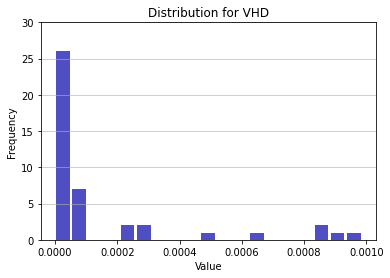

In [19]:
show_histogram(og_data['VHD'], 'Distribution for VHD')

In [28]:
def show_boxplot(data, title):
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data)
    plt.title(title)
    plt.show()

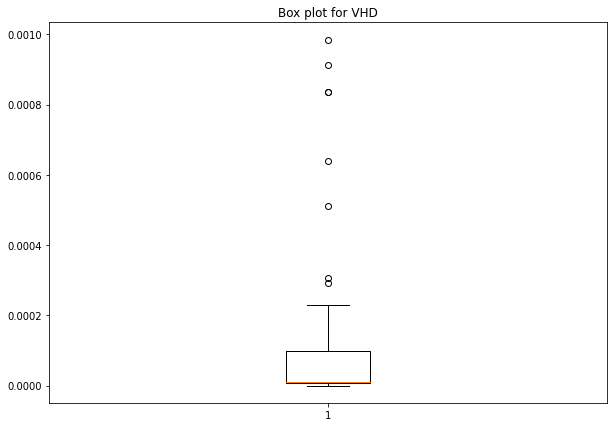

In [31]:
show_boxplot(og_data['VHD'], 'Box plot for VHD')